In [1]:
import pandas as pd
import numpy as np
import csv
# from surprise import SVD, SVDpp
# from surprise import Dataset
# import pandas as pd
# import surprise
# from surprise import Reader
# from surprise.model_selection import cross_validate
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error
import lightgbm as lgbm
import copy
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('Data/my_data/final_data/train3.csv')

In [3]:
test_df = pd.read_csv('Data/my_data/final_data/test3.csv')

In [4]:
# df_train = train_df[base_columns]
# df_test = test_df[base_columns]
df_all = pd.concat([train_df, test_df])

In [5]:
ua_svd = df_all['svd_ua']
ua_svd_fixed = []
for x in ua_svd:
    try:
        ua_svd_fixed.append(float(x))
    except:
        ua_svd_fixed.append(float(x[2:-2]))
df_all['svd_ua'] = ua_svd_fixed

In [6]:
# base_columns = []
# for col in train_df.columns:
#     if col in ['user', 'song', 'title' ,'artist', 'lyrics']:
#         continue
#     base_columns.append(col)

In [7]:
if 's_country' in df_all.columns:
    df_all['country'] = pd.factorize(df_all['s_country'])[0] + 1
    df_all = df_all[[i for i in list(df_all.columns) if 's_country' != i]]
X = df_all[[x for x in df_all.columns if 'sim' not in x and 'count' not in x and
            'svd' not in x and x not in ['user', 'song', 'title' ,'artist', 'lyrics', 'target']]]
Y = df_all['target']

In [9]:
max(X['age_diff'])

1028.0

In [10]:
for x in X.columns:
    print('%s - [%s - %s]' % (x, min(X[x]), max(X[x])))

age_diff - [0.0 - 1028.0]
exp_DM - [101.0 - 3112.0]
exp_MY - [12010.0 - 122019.0]
exp_Y - [2004.0 - 2020.0]
exp_YMD - [20041016.0 - 20201017.0]
reg_DM - [101.0 - 3112.0]
reg_MY - [12005.0 - 122016.0]
reg_Y - [2004.0 - 2017.0]
reg_YMD - [20040326.0 - 20170131.0]
s_year - [1919.0 - 2018.0]
u_age - [-43.0 - 1030.0]
popularity - [0.0 - 93.0]
acousticness - [1.39e-06 - 0.996]
danceability - [0.0596 - 0.986]
duration_ms - [22750.0 - 1412451.0]
energy - [0.00264 - 0.9990000000000001]
instrumentalness - [0.0 - 0.996]
liveness - [0.00967 - 0.99]
loudness - [-42.402 - 0.892]
speechiness - [0.0225 - 0.96]
tempo - [36.71 - 239.84799999999998]
valence - [0.0176 - 0.9890000000000001]
Doc2Vec_0 - [-4.439262390136719 - 4.465700149536133]
Doc2Vec_1 - [-4.500436305999756 - 3.739881992340088]
Doc2Vec_2 - [-5.070983409881592 - 3.958807468414306]
Doc2Vec_3 - [-4.517634391784668 - 4.858319282531738]
Doc2Vec_4 - [-2.8271477222442627 - 4.203880786895752]
sentiment_negative - [0.0 - 0.603]
sentiment_neutral - 

In [8]:
train_set_x = X.head(len(train_df))
train_set_y = Y.head(len(train_df))
test_set_x = X.tail(len(test_df))
test_set_y = Y.tail(len(test_df))

In [9]:
train_set_x.columns

Index(['age_diff', 'exp_DM', 'exp_MY', 'exp_Y', 'exp_YMD', 'reg_DM', 'reg_MY',
       'reg_Y', 'reg_YMD', 's_year', 'u_age', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'Doc2Vec_0', 'Doc2Vec_1',
       'Doc2Vec_2', 'Doc2Vec_3', 'Doc2Vec_4', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive'],
      dtype='object')

In [10]:
model1 = lgbm.LGBMClassifier(learning_rate=0.05, max_depth=15, 
                             num_leaves=2**8, colsample_bytree=0.7,
                             subsample=0.7)
model1.fit(train_set_x, train_set_y, verbose=1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
        importance_type='split', learning_rate=0.05, max_depth=15,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=256, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [11]:
model2 = lgbm.LGBMClassifier(learning_rate=0.1, max_depth=15, 
                             num_leaves=2**8, colsample_bytree=0.9,
                             subsample=0.9)
model2.fit(train_set_x, train_set_y, verbose=1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
        importance_type='split', learning_rate=0.1, max_depth=15,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=256, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [12]:
# parameters = {'learning_rate':[0.01, 0.05, 0.1], 
#               'max_depth':[15, 25, 35],
#              'colsample_bytree':[0.6,0.7,0.8,0.9],
#              'subsample':[0.6,0.7,0.8,0.9]}

# search = GridSearchCV(estimator = model1, param_grid = parameters, scoring='roc_auc',
#                           cv = 4, n_jobs = 2, verbose = 2)

# # Fits Grid Search CV to find best params
# search.fit(train_set_x, train_set_y)

# b_params = search.best_params_
# print('Best params -',b_params)
# logRegModel = search.best_estimator_

In [60]:
model3 = lgbm.LGBMClassifier(learning_rate=0.01, max_depth=25, 
                             num_leaves=2**8, colsample_bytree=0.6,
                             subsample=0.6)
model3.fit(train_set_x, train_set_y, verbose=1)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        importance_type='split', learning_rate=0.01, max_depth=25,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=256, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.6, subsample_for_bin=200000, subsample_freq=0)

In [34]:
# train_set_x, train_set_y, test_set_x, test_set_y

In [13]:
y1 = [x[1] for x in model1.predict_proba(train_set_x)]
print('model1 train AUC',roc_auc_score(train_set_y, y1))
y2 = [x[1] for x in model2.predict_proba(train_set_x)]
print('model2 train AUC',roc_auc_score(train_set_y, y2))
# y3 = [x[1] for x in model3.predict_proba(train_set_x)]
# print('model3 train AUC',roc_auc_score(train_set_y, y3))
ensemble_train = [(y1[i]+y2[i])/2 for i in range(len(y1))]
print('ensemble_train train AUC',roc_auc_score(train_set_y, ensemble_train))

model1 train AUC 0.7166138695164465
model2 train AUC 0.7459865638891608
ensemble_train train AUC 0.7347566814036153


In [14]:

y_pred1 = [x[1] for x in model1.predict_proba(test_set_x)]
print('model1 test AUC',roc_auc_score(test_set_y, y_pred1))
y_pred2 = [x[1] for x in model2.predict_proba(test_set_x)]
print('model2 test AUC',roc_auc_score(test_set_y, y_pred2))
# y_pred3 = [x[1] for x in model3.predict_proba(test_set_x)]
# print('model3 test AUC',roc_auc_score(test_set_y, y_pred3))
ensemble_test = [(y_pred1[i]+y_pred2[i])/2 for i in range(len(y_pred1))]
print('ensemble_test test AUC',roc_auc_score(test_set_y, ensemble_test))


model1 test AUC 0.6170694079642084
model2 test AUC 0.6137922446057105
ensemble_test test AUC 0.6173295152538594


In [13]:
train_set_x.shape

(632393, 30)

No handles with labels found to put in legend.


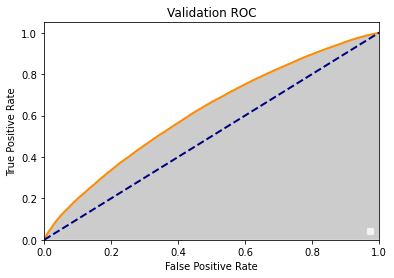

In [37]:
# Prints ROC graph
fpr, tpr, thresholds = roc_curve(test_set_y, ensemble_test)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC')
plt.legend(loc="lower right")
plt.fill_between(fpr, tpr, facecolor='grey', step="pre", alpha=0.4)
plt.show()

In [30]:
tmpX = []
tmpY = []
for x in range(len(fpr)):
    tmpX.append(float(x/(len(fpr)-1)))
    tmpY.append(float(x/(len(fpr)-1)))
    

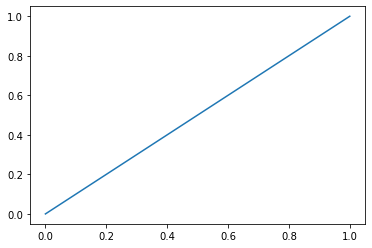

In [31]:
plt.plot(tmpX, tmpY)
plt.show()